# ALP Data Mining 
###  Kelompok 9 - Clustering 
- Amanda (0706022310010)
- Ruby (0706022310035)
- Sherin (0706022310013)

##### Penjelasan Dataset:

- Gambaran Umum: Menyediakan data komprehensif mengenai faktor-faktor yang memengaruhi kinerja siswa (demografis, akademik, dan perilaku).

- Variabel Utama: Mencakup pendidikan orang tua, akses sumber belajar, durasi belajar, kehadiran, dan ekstrakurikuler.

- Metrik Akademik: Nilai spesifik (Matematika, Sains, Bahasa Inggris) serta skor kinerja keseluruhan dan grade akhir.

- Tujuan: Digunakan untuk menganalisis pola dan mengelompokkan (clustering) karakteristik siswa berdasarkan profil akademik dan perilaku mereka.

##### Rincian Atribut Dataset

Dataset ini terdiri dari 25.000 baris (sampel siswa) dengan atribut yang dikelompokkan sebagai berikut:

- Demografi (Demographics) : Mencakup informasi dasar siswa seperti Usia (Age), Jenis Kelamin (Gender), dan Tipe Sekolah (School Type) yang dihadiri.

- Latar Belakang Keluarga (Family Background) : Berisi informasi mengenai Tingkat Pendidikan Orang Tua (Parent Education Level), yang sering kali berkorelasi dengan dukungan akademik di rumah.

- Kebiasaan Belajar (Study-related Habits) : Meliputi perilaku belajar siswa, yaitu Jam Belajar Harian (Daily Study Hours), Metode Belajar (Study Method) yang digunakan, serta ketersediaan Akses Internet (Internet Access).

- Keterlibatan di Sekolah (School Engagement) : Mengukur seberapa aktif siswa di lingkungan sekolah, dilihat dari Persentase Kehadiran (Attendance Percentage), Waktu Tempuh ke sekolah (Travel Time), dan Partisipasi dalam Kegiatan Ekstrakurikuler (Participation in Extra Activities).

- Rekam Akademik (Academic Records) : Nilai spesifik pada mata pelajaran inti: Matematika (Math), Sains (Science), dan Bahasa Inggris (English).

- Hasil Akhir (Final Outcomes) :  Metrik evaluasi akhir berupa Skor Kinerja Keseluruhan (Overall Performance Score) dan Grade (Assigned Grade) yang diperoleh siswa.

## Import Library

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

In [3]:
url = "https://raw.githubusercontent.com/amandarenataa/Datasets/main/Student_Performance.csv"
df = pd.read_csv(url)
df.head()

,student_id,age,gender,school_type,parent_education,study_hours,attendance_percentage,internet_access,travel_time,extra_activities,study_method,math_score,science_score,english_score,overall_score,final_grade
0,1,14,male,public,post graduate,3.1,84.3,yes,<15 min,yes,notes,42.7,55.4,57.0,53.1,e
1,2,18,female,public,graduate,3.7,87.8,yes,>60 min,no,textbook,57.6,68.8,64.8,61.3,d
2,3,17,female,private,post graduate,7.9,65.5,no,<15 min,no,notes,84.8,95.0,79.2,89.6,b
3,4,16,other,public,high school,1.1,58.1,no,15-30 min,no,notes,44.4,27.5,54.7,41.6,e
4,5,16,female,public,high school,1.3,61.0,yes,30-60 min,yes,group study,8.9,32.7,30.0,25.4,f


In [4]:
# describe data
df.describe()

,student_id,age,study_hours,attendance_percentage,math_score,science_score,english_score,overall_score
count,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,7493.04380,16.482760,4.253224,75.084084,63.785944,63.745320,63.681948,64.006172
std,4323.56215,1.703895,2.167541,14.373171,20.875262,20.970529,20.792693,18.932025
min,1.00000,14.000000,0.500000,50.000000,0.000000,0.000000,0.000000,14.500000
25%,3743.75000,15.000000,2.400000,62.800000,48.300000,48.200000,48.300000,49.000000
50%,7461.50000,16.000000,4.300000,75.100000,64.100000,64.100000,64.200000,64.200000
75%,11252.00000,18.000000,6.100000,87.500000,80.000000,80.000000,80.000000,79.000000
max,15000.00000,19.000000,8.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [5]:
# Check for info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             25000 non-null  int64  
 1   age                    25000 non-null  int64  
 2   gender                 25000 non-null  object 
 3   school_type            25000 non-null  object 
 4   parent_education       25000 non-null  object 
 5   study_hours            25000 non-null  float64
 6   attendance_percentage  25000 non-null  float64
 7   internet_access        25000 non-null  object 
 8   travel_time            25000 non-null  object 
 9   extra_activities       25000 non-null  object 
 10  study_method           25000 non-null  object 
 11  math_score             25000 non-null  float64
 12  science_score          25000 non-null  float64
 13  english_score          25000 non-null  float64
 14  overall_score          25000 non-null  float64
 15  fi

No missing values

In [6]:
# drop student id
df = df.drop('student_id', axis=1)

Drop Student ID because the data is all different

In [7]:
# find unique values
unique_values_dict = {col: df[col].unique() for col in df.columns}
print("--- Unique Values ---")
display(unique_values_dict)

unique_counts_series = df.nunique()
print("\n--- Counts of Unique Values (Series) ---")
display(unique_counts_series)

--- Unique Values ---


{'age': array([14, 18, 17, 16, 19, 15], dtype=int64),
 'gender': array(['male', 'female', 'other'], dtype=object),
 'school_type': array(['public', 'private'], dtype=object),
 'parent_education': array(['post graduate', 'graduate', 'high school', 'no formal', 'diploma',
        'phd'], dtype=object),
 'study_hours': array([3.1, 3.7, 7.9, 1.1, 1.3, 3.8, 1.8, 5.6, 3.2, 6.8, 6.1, 4. , 4.9,
        5. , 2.3, 0.9, 4.5, 4.4, 5.4, 2.1, 7.8, 1.4, 8. , 5.9, 5.2, 3. ,
        7. , 7.3, 5.8, 4.2, 0.6, 3.3, 6.3, 6. , 1.2, 1.5, 4.8, 6.7, 5.3,
        2.5, 7.5, 2. , 2.8, 7.1, 6.5, 5.7, 0.5, 1.6, 0.7, 5.5, 2.7, 6.4,
        5.1, 3.9, 3.6, 1.9, 7.4, 7.7, 1.7, 1. , 7.6, 7.2, 2.4, 4.1, 4.7,
        2.6, 6.9, 6.2, 4.6, 0.8, 2.9, 3.5, 3.4, 4.3, 2.2, 6.6]),
 'attendance_percentage': array([ 84.3,  87.8,  65.5,  58.1,  61. ,  69.6,  81.6,  59.4,  89.6,
         62.4,  90.5,  96.2,  58.2,  95.9,  85.3,  94.4,  67.3,  93.2,
         73.8,  59.5,  99.8,  97.4,  56.2,  72.8,  99.3,  77.4,  74.9,
         59.8, 


--- Counts of Unique Values (Series) ---


age                        6
gender                     3
school_type                2
parent_education           6
study_hours               76
attendance_percentage    501
internet_access            2
travel_time                4
extra_activities           2
study_method               6
math_score               906
science_score            907
english_score            904
overall_score            808
final_grade                6
dtype: int64

## EDA

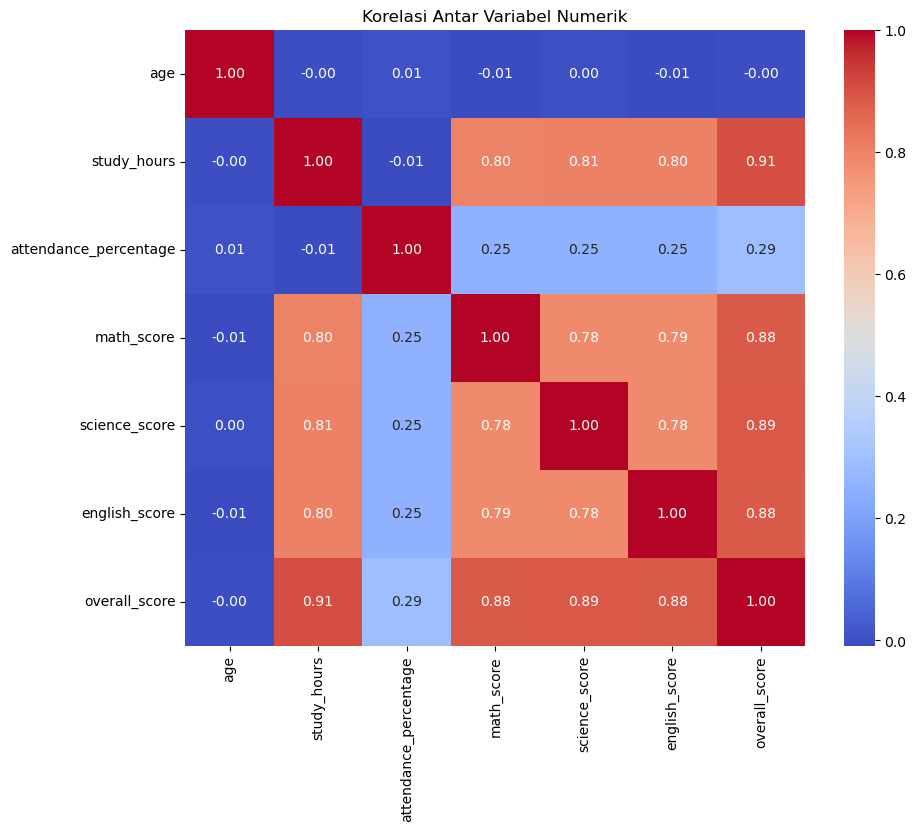

In [8]:
num_cols = ['age', 'study_hours', 'attendance_percentage', 'math_score', 'science_score', 'english_score', 'overall_score']
corr_matrix = df[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antar Variabel Numerik')
plt.show()

Temuan:

- Variabel study_hours memiliki korelasi positif yang sangat kuat (0.91) terhadap overall_score. Ini mengindikasikan bahwa jam belajar adalah faktor paling krusial dalam menentukan nilai akhir siswa. Semakin lama belajar, nilai semakin tinggi.

- math_score, science_score, dan english_score saling berkorelasi sangat tinggi satu sama lain (sekitar 0.78 - 0.89) dan juga terhadap overall_score. Ini karena overall_score adalah rata-rata atau gabungan dari ketiga nilai tersebut.

- attendance_percentage memiliki korelasi positif tetapi lemah (sekitar 0.29 terhadap overall_score). Rajin hadir membantu, tapi tidak seberpengaruh durasi belajar mandiri.

- Variabel age memiliki korelasi mendekati 0.00 dengan semua variabel nilai. Artinya, umur siswa tidak menentukan kepintaran atau performa mereka di dataset ini.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5680\1032633301.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='parent_education', y='overall_score', data=df, order=edu_order, palette="Set2")


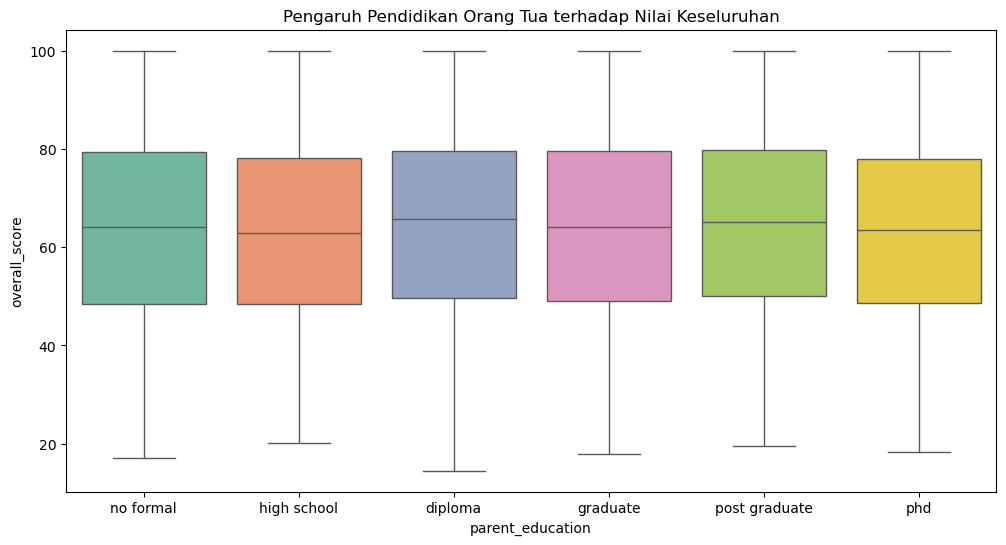

In [9]:
edu_order = ['no formal', 'high school', 'diploma', 'graduate', 'post graduate', 'phd']

plt.figure(figsize=(12, 6))
sns.boxplot(x='parent_education', y='overall_score', data=df, order=edu_order, palette="Set2")
plt.title('Pengaruh Pendidikan Orang Tua terhadap Nilai Keseluruhan')
plt.show()

Temuan:

- Median dari overall_score terlihat relatif sejajar di angka 60-an untuk semua jenjang pendidikan, mulai dari 'no formal' hingga 'phd'.

- Rentang sebaran data juga terlihat sangat mirip antar kategori. Tidak terlihat adanya tren naik yang jelas di mana anak dari orang tua 'phd' memiliki nilai yang jauh lebih tinggi dibanding anak orang tua 'no formal'.

- Dalam dataset ini, latar belakang pendidikan orang tua tampaknya bukan faktor pembeda yang kuat untuk memprediksi nilai siswa.

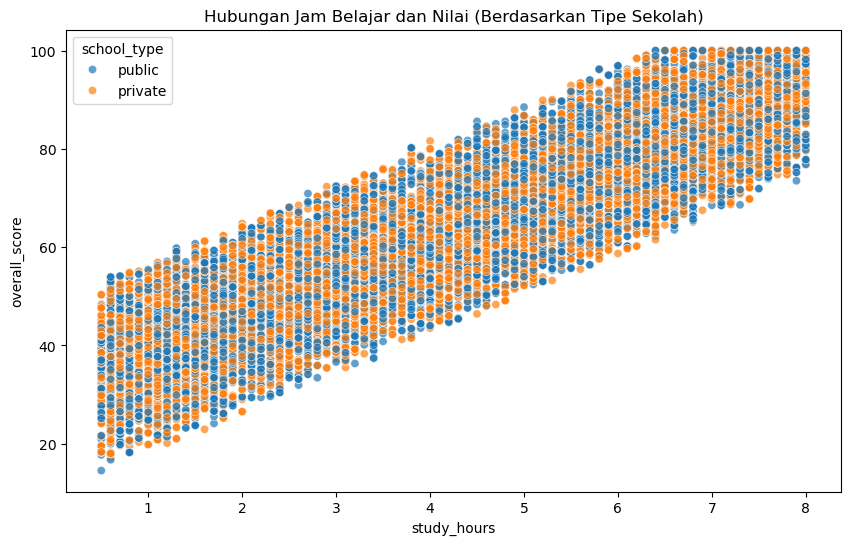

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='study_hours', y='overall_score', hue='school_type', data=df, alpha=0.7)
plt.title('Hubungan Jam Belajar dan Nilai (Berdasarkan Tipe Sekolah)')
plt.show()

Temuan:

- Terlihat pola garis lurus yang jelas menanjak ke kanan atas. Ini memvalidasi temuan di heatmap bahwa hubungan study_hours dan overall_score adalah linear positif.

- Titik-titik biru (public) dan oranye (private) tersebar merata dan bercampur di sepanjang garis tren. Tidak ada pengelompokan terpisah.

- Siswa di sekolah negeri maupun swasta memiliki performa yang sama jika jam belajarnya sama. Tipe sekolah tidak memberikan keuntungan atau kerugian signifikan terhadap nilai akhir.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5680\2751599975.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='final_grade', data=df, order=['f','e','d','c','b','a'], palette="Set2")


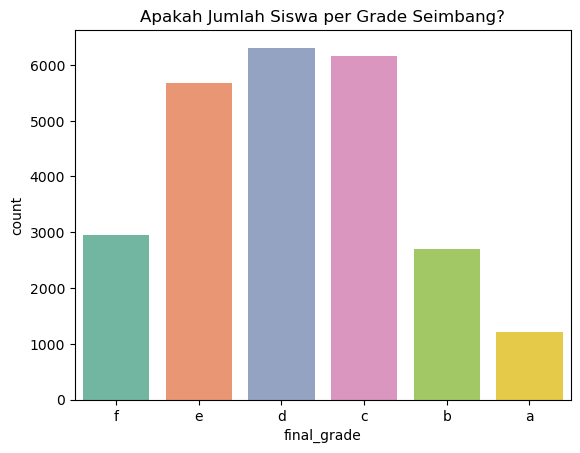

In [11]:
sns.countplot(x='final_grade', data=df, order=['f','e','d','c','b','a'], palette="Set2")
plt.title('Apakah Jumlah Siswa per Grade Seimbang?')
plt.show()

Temuan:

- Data tidak terdistribusi rata. Mayoritas siswa berada di grade menengah ke bawah, yaitu D dan C (masing-masing di atas 6000 siswa).

-  Grade A adalah kelas minoritas. Grade F (Gagal) jumlahnya cukup moderat (sekitar 3000-an).

- Jika membuat model klasifikasi tanpa penanganan khusus, model akan cenderung bias memprediksi nilai 'D' atau 'C' karena itu adalah data yang paling sering dilihatnya. Model akan kesulitan memprediksi siswa yang mendapat nilai 'A' dengan akurat karena contoh belajarnya sedikit.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5680\1879039046.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='study_method', y='overall_score', data=df, palette="Set2")


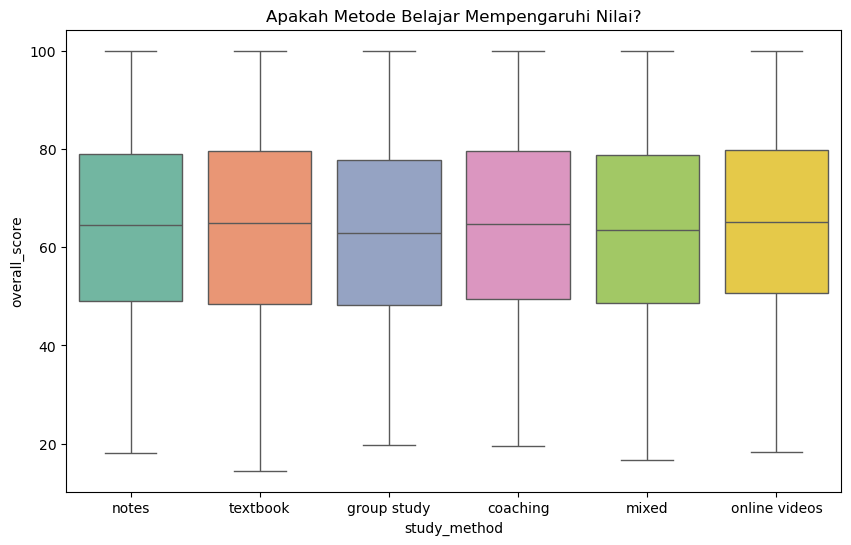

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(x='study_method', y='overall_score', data=df, palette="Set2")
plt.title('Apakah Metode Belajar Mempengaruhi Nilai?')
plt.show()

Temuan:

- Secara visual, hampir tidak ada perbedaan antara satu kotak dengan kotak lainnya. Garis tengah (median) untuk semua kategori mulai dari notes, textbook, hingga online videos, berada di garis horizontal yang sama (sekitar nilai 60-an).

- Tidak ada satu pun metode belajar yang kotak distribusinya lebih tinggi secara signifikan dibandingkan yang lain. Rentang nilai (ujung atas ke ujung bawah) juga mirip.

- Variabel study_method tidak memiliki korelasi yang kuat dengan nilai siswa. Sama seperti parent_education, fitur ini kemungkinan besar adalah noise (gangguan) bagi model dan tidak akan membantu prediksi secara signifikan.

## Feature Engineering

In [13]:
df_encoded = df.copy()

nominal_cols = ['gender', 'school_type', 'internet_access', 'extra_activities', 'study_method']
ordinal_cols = ['parent_education', 'travel_time', 'final_grade']

edu_order = ['no formal', 'high school','diploma','graduate','post graduate', 'phd'] 
time_order = ['<15 min', '15-30 min', '30-60 min', '>60 min']
grade_order = ['f','e', 'd', 'c', 'b', 'a'] 

ord_encoder_specific = OrdinalEncoder(categories=[edu_order, time_order, grade_order])

df_encoded[ordinal_cols] = ord_encoder_specific.fit_transform(df_encoded[ordinal_cols])

nom_encoder_default = OrdinalEncoder()
df_encoded[nominal_cols] = nom_encoder_default.fit_transform(df_encoded[nominal_cols])

encode_dict = {}

for col, cats in zip(ordinal_cols, ord_encoder_specific.categories_):
    encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}

for col, cats in zip(nominal_cols, nom_encoder_default.categories_):
    encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}

import pprint
pprint.pprint(encode_dict)

df_encoded.head()

{'extra_activities': {'no': 0, 'yes': 1},
 'final_grade': {'a': 5, 'b': 4, 'c': 3, 'd': 2, 'e': 1, 'f': 0},
 'gender': {'female': 0, 'male': 1, 'other': 2},
 'internet_access': {'no': 0, 'yes': 1},
 'parent_education': {'diploma': 2,
                      'graduate': 3,
                      'high school': 1,
                      'no formal': 0,
                      'phd': 5,
                      'post graduate': 4},
 'school_type': {'private': 0, 'public': 1},
 'study_method': {'coaching': 0,
                  'group study': 1,
                  'mixed': 2,
                  'notes': 3,
                  'online videos': 4,
                  'textbook': 5},
 'travel_time': {'15-30 min': 1, '30-60 min': 2, '<15 min': 0, '>60 min': 3}}


,age,gender,school_type,parent_education,study_hours,attendance_percentage,internet_access,travel_time,extra_activities,study_method,math_score,science_score,english_score,overall_score,final_grade
0,14,1.0,1.0,4.0,3.1,84.3,1.0,0.0,1.0,3.0,42.7,55.4,57.0,53.1,1.0
1,18,0.0,1.0,3.0,3.7,87.8,1.0,3.0,0.0,5.0,57.6,68.8,64.8,61.3,2.0
2,17,0.0,0.0,4.0,7.9,65.5,0.0,0.0,0.0,3.0,84.8,95.0,79.2,89.6,4.0
3,16,2.0,1.0,1.0,1.1,58.1,0.0,1.0,0.0,3.0,44.4,27.5,54.7,41.6,1.0
4,16,0.0,1.0,1.0,1.3,61.0,1.0,2.0,1.0,1.0,8.9,32.7,30.0,25.4,0.0


In [14]:
df_scaled = df_encoded.copy()
cols_to_scale = ['age', 'study_hours', 'attendance_percentage','math_score','science_score','english_score']

sc = StandardScaler()
df_scaled[cols_to_scale] = sc.fit_transform(df_scaled[cols_to_scale])

df_scaled.head()

,age,gender,school_type,parent_education,study_hours,attendance_percentage,internet_access,travel_time,extra_activities,study_method,math_score,science_score,english_score,overall_score,final_grade
0,-1.457138,1.0,1.0,4.0,-0.532053,0.641202,1.0,0.0,1.0,3.0,-1.010113,-0.397963,-0.321367,53.1,1.0
1,0.890472,0.0,1.0,3.0,-0.255236,0.884716,1.0,3.0,0.0,5.0,-0.296335,0.241042,0.053772,61.3,2.0
2,0.303569,0.0,0.0,4.0,1.682482,-0.666817,0.0,0.0,0.0,3.0,1.006669,1.490439,0.746337,89.6,4.0
3,-0.283333,2.0,1.0,1.0,-1.454776,-1.181675,0.0,1.0,0.0,3.0,-0.928675,-1.728428,-0.431985,41.6,1.0
4,-0.283333,0.0,1.0,1.0,-1.362504,-0.979907,1.0,2.0,1.0,1.0,-2.629286,-1.480456,-1.619926,25.4,0.0


In [15]:
# get stastical information on the new dataset
df_scaled.describe()

,age,gender,school_type,parent_education,study_hours,attendance_percentage,internet_access,travel_time,extra_activities,study_method,math_score,science_score,english_score,overall_score,final_grade
count,2.500000e+04,25000.000000,25000.000000,25000.000000,2.500000e+04,2.500000e+04,25000.000000,25000.000000,25000.00000,25000.000000,2.500000e+04,2.500000e+04,2.500000e+04,25000.000000,25000.000000
mean,5.849188e-16,1.006920,0.491000,2.495720,2.587086e-16,-3.043965e-16,0.849080,1.502000,0.50000,2.520720,3.085887e-16,-3.188205e-16,-2.704326e-16,64.006172,2.143440
std,1.000020e+00,0.818596,0.499929,1.697085,1.000020e+00,1.000020e+00,0.357978,1.110624,0.50001,1.700472,1.000020e+00,1.000020e+00,1.000020e+00,18.932025,1.338199
min,-1.457138e+00,0.000000,0.000000,0.000000,-1.731593e+00,-1.745237e+00,0.000000,0.000000,0.00000,0.000000,-3.055637e+00,-3.039818e+00,-3.062769e+00,14.500000,0.000000
25%,-8.702352e-01,0.000000,0.000000,1.000000,-8.550061e-01,-8.546708e-01,1.000000,1.000000,0.00000,1.000000,-7.418472e-01,-7.413085e-01,-7.397914e-01,49.000000,1.000000
50%,-2.833329e-01,1.000000,0.000000,2.000000,2.158064e-02,1.107363e-03,1.000000,2.000000,0.50000,3.000000,1.504471e-02,1.691360e-02,2.491560e-02,64.200000,2.000000
75%,8.904716e-01,2.000000,1.000000,4.000000,8.520313e-01,8.638431e-01,1.000000,2.000000,1.00000,4.000000,7.767270e-01,7.751357e-01,7.848131e-01,79.000000,3.000000
max,1.477374e+00,2.000000,1.000000,5.000000,1.728618e+00,1.733536e+00,1.000000,3.000000,1.00000,5.000000,1.734818e+00,1.728874e+00,1.746709e+00,100.000000,5.000000


## Comparing Silhouette Score to get best combination of linkage and metric

Mulai mencari parameter terbaik...


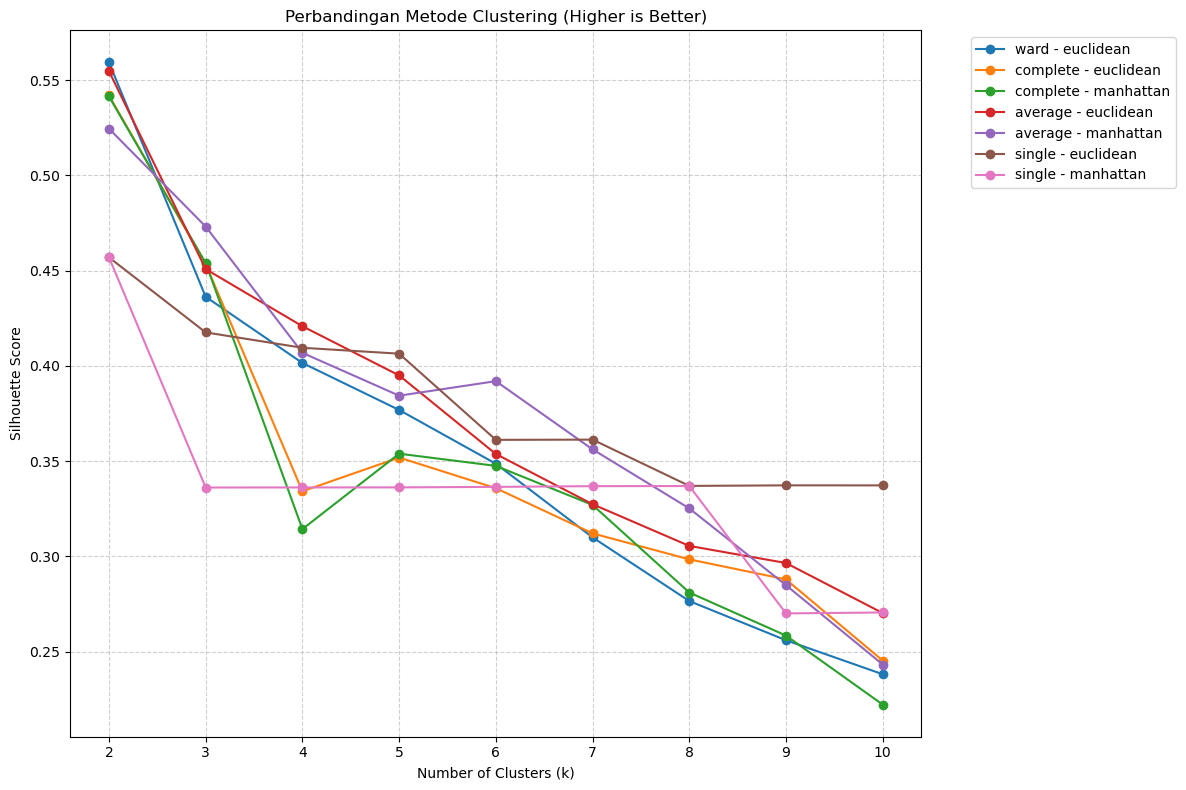

HASIL TERBAIK:
Silhouette Score   : 0.5593
Jumlah Cluster (k) : 2
Linkage Method     : ward
Metric Jarak       : euclidean


In [16]:
X_input = df_scaled 

range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

print("Mulai mencari parameter terbaik...")

for linkage_method in linkage_methods:
    for metric in metrics:
        if linkage_method == 'ward' and metric == 'manhattan':
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            cluster_labels = agglo.fit_predict(X_input)
            
            silhouette_avg = silhouette_score(X_input, cluster_labels)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        
        results_for_plotting.append({
            'label': f"{linkage_method} - {metric}",
            'scores': current_scores
        })

plt.figure(figsize=(12, 8))

for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=result['label'])

plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Perbandingan Metode Clustering (Higher is Better)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Taruh legenda di luar grafik biar rapi
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print("="*40)
print(f"HASIL TERBAIK:")
print(f"Silhouette Score   : {best_silhouette_score:.4f}")
print(f"Jumlah Cluster (k) : {best_n_clusters}")
print(f"Linkage Method     : {best_linkage}")
print(f"Metric Jarak       : {best_metric}")
print("="*40)

## Hierarchical Clustering Model

In [17]:
# Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_hc = agglo.fit_predict(df_scaled)

In [24]:
# Evaluation
ss = silhouette_score(df_scaled, y_hc)
print(ss)

0.5593055011219372


Evaluasi performa model dilakukan menggunakan metrik Silhouette Score. Berdasarkan pengujian, model menghasilkan skor 0.559, yang mengindikasikan bahwa cluster terpisah dengan cukup baik (reasonable structure) dan kepadatan intra-cluster yang solid.

## Dendogram Visualization for Hierarchical Clustering Model

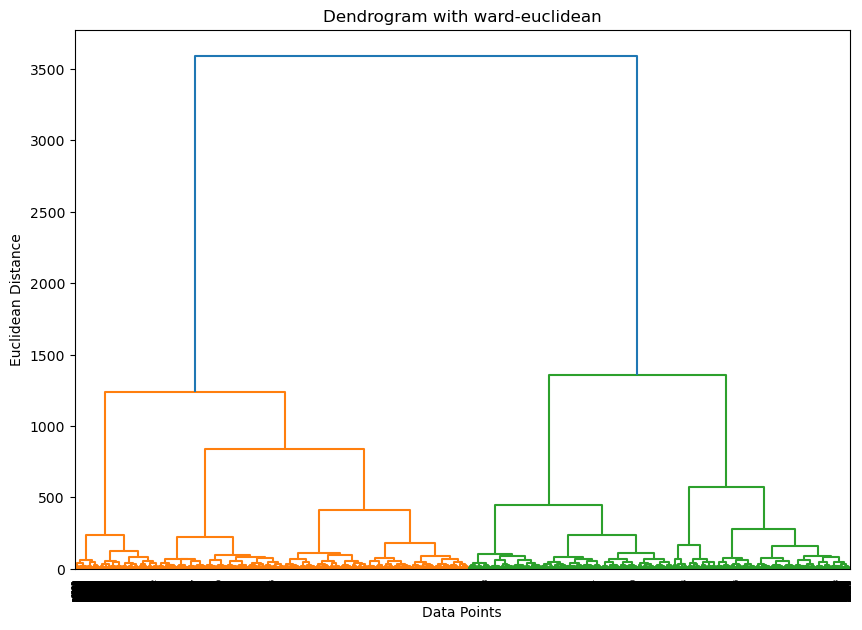

In [18]:
# Average Distance
linked = linkage(df_scaled, method=best_linkage, metric=best_metric)

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with " + best_linkage + "-" + best_metric)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

## Merge with the original data

In [19]:
# Add the cluster labels to the original data
df['Agglo'] = y_hc

# Analyze the clusters with the original values
df.head()

,age,gender,school_type,parent_education,study_hours,attendance_percentage,internet_access,travel_time,extra_activities,study_method,math_score,science_score,english_score,overall_score,final_grade,Agglo
0,14,male,public,post graduate,3.1,84.3,yes,<15 min,yes,notes,42.7,55.4,57.0,53.1,e,0
1,18,female,public,graduate,3.7,87.8,yes,>60 min,no,textbook,57.6,68.8,64.8,61.3,d,0
2,17,female,private,post graduate,7.9,65.5,no,<15 min,no,notes,84.8,95.0,79.2,89.6,b,1
3,16,other,public,high school,1.1,58.1,no,15-30 min,no,notes,44.4,27.5,54.7,41.6,e,0
4,16,female,public,high school,1.3,61.0,yes,30-60 min,yes,group study,8.9,32.7,30.0,25.4,f,0


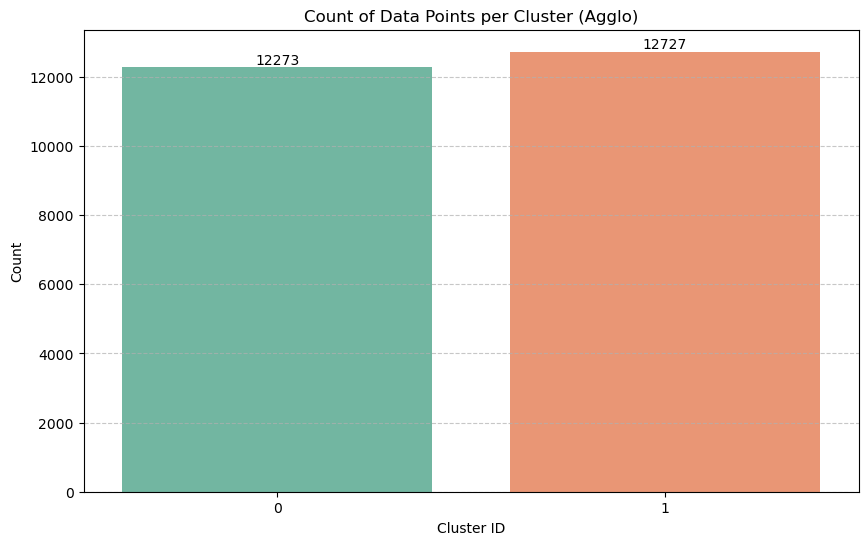

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df['Agglo'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

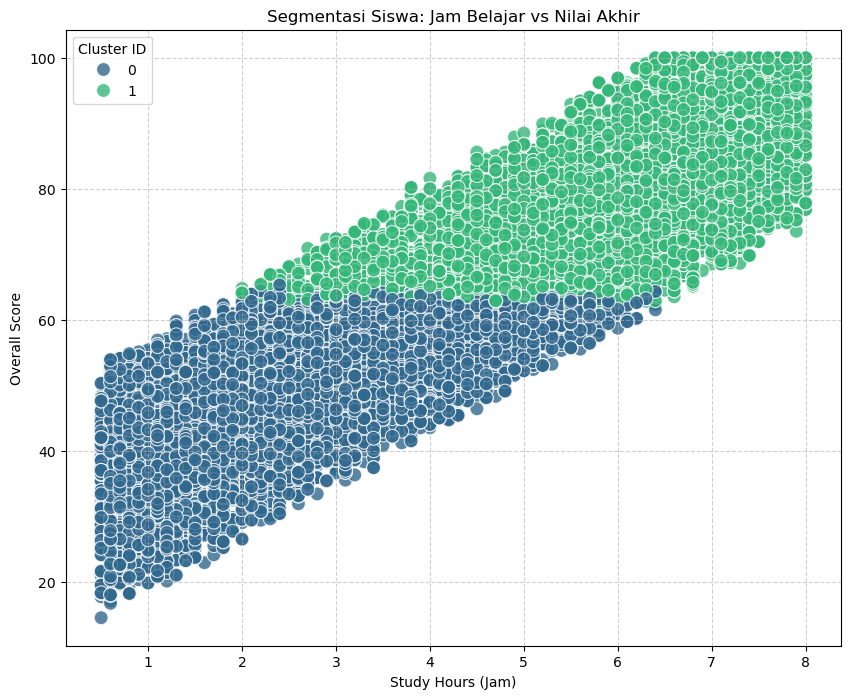

In [21]:
agglo = AgglomerativeClustering(n_clusters=2, linkage='ward', metric='euclidean')
df['Cluster_Labels'] = agglo.fit_predict(df_scaled) 

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, 
                x='study_hours', 
                y='overall_score', 
                hue='Cluster_Labels', 
                palette='viridis',     
                s=100,                
                alpha=0.8)

plt.title('Segmentasi Siswa: Jam Belajar vs Nilai Akhir')
plt.xlabel('Study Hours (Jam)')
plt.ylabel('Overall Score')
plt.legend(title='Cluster ID')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [22]:
import plotly.express as px

df['Cluster_Labels'] = agglo.fit_predict(df_scaled)
x_col = 'study_hours'
y_col = 'attendance_percentage'
z_col = 'overall_score'

fig = px.scatter_3d(df,
                    x=x_col,
                    y=y_col,
                    z=z_col,
                    color=df['Cluster_Labels'].astype(str),
                    title='3D Segmentation: Study Hours vs Attendance vs Score',
                    opacity=0.7,                  
                    size_max=10                   
                    )

fig.update_layout(margin=dict(l=0, r=0, b=0, t=40))
fig.show()

## Statistical Summary for each cluster

In [23]:
def get_mode(x):
    return x.mode()[0] if not x.mode().empty else 'N/A'

score_cols = ['math_score', 'science_score', 'english_score', 'overall_score']

num_cols = ['study_hours', 'attendance_percentage', 'age']

cat_cols = ['gender', 'school_type', 'parent_education', 'study_method', 'extra_activities', 'final_grade']

agg_dict = {}

for col in score_cols:
    agg_dict[col] = ['mean', 'std']

for col in num_cols:
    agg_dict[col] = ['mean']        

for col in cat_cols:
    agg_dict[col] = [get_mode]       
    
cluster_profile = df.groupby('Cluster_Labels').agg(agg_dict)

cluster_profile = cluster_profile.rename(columns={'get_mode': 'Dominan', 'mean': 'Rata2', 'std': 'Deviasi'}, level=1)

cluster_profile.T

Cluster_Labels                           0          1
math_score            Rata2      47.792593  79.208777
                      Deviasi    14.321839  13.178726
science_score         Rata2      47.711391  79.207284
                      Deviasi    14.326742  13.375819
english_score         Rata2       47.77391  79.022511
                      Deviasi    14.252182  13.190737
overall_score         Rata2      47.753964  79.678628
                      Deviasi    10.285281   10.08436
study_hours           Rata2       2.476045   5.967007
attendance_percentage Rata2       72.45618  77.618245
age                   Rata2      16.475434  16.489825
gender                Dominan        other      other
school_type           Dominan      private    private
parent_education      Dominan  high school    diploma
study_method          Dominan        mixed   textbook
extra_activities      Dominan           no        yes
final_grade           Dominan            e          c

## Implikasi Manajerial Berdasarkan Profiling Siswa
### Cluster 0 (n = Dominan 'E') — Siswa Berisiko Akademik
Profil:

Akademik: Nilai rata-rata sangat rendah (Overall ±47,7). Dominan Grade 'E' (Gagal).

Perilaku: Jam belajar mandiri minim (±2,4 jam), absensi lebih rendah (72%), dan tidak mengikuti kegiatan ekstrakurikuler (extra_activities: no).

Latar Belakang: Dominan orang tua berpendidikan SMA (high school), metode belajar "Mixed" (Campuran/Tidak Terstruktur).

Makna: Kelompok ini adalah siswa yang kurang terlibat dengan sekolah. Mereka tidak memiliki rutinitas belajar yang kuat, mungkin bingung dengan gaya belajar mereka, dan tidak memiliki keterikatan sosial lewat ekstrakurikuler. Risiko tinggal kelas atau dropout sangat tinggi.

Strategi Intervensi:

Program Remedial Wajib & Mentoring: Karena jam belajar mandiri rendah, sekolah harus memfasilitasi "jam tambahan" yang diawasi guru setelah sekolah untuk mengejar ketertinggalan materi.

Bimbingan Konseling & Motivasi: Metode belajar "Mixed" mengindikasikan ketidaktahuan cara belajar. Konselor perlu membantu siswa menemukan gaya belajar yang efektif (bukan sekadar campur aduk).

Keterlibatan Orang Tua: Karena pendidikan orang tua dominan SMA, sekolah perlu mengadakan parenting session untuk mengedukasi orang tua tentang cara mendampingi anak belajar di rumah.

Wajib Ekstrakurikuler: Dorong siswa ini masuk ke minimal satu ekskul (olahraga/seni) untuk meningkatkan rasa memiliki terhadap sekolah dan kedisiplinan.

Fokus KPI:

Peningkatan Attendance Rate > 85%.

Penurunan persentase nilai F, E dan D.

Peningkatan jam belajar mandiri (via logbook siswa).

### Cluster 1 (n = Dominan 'C') — Siswa Tekun & Aktif
Profil:

Akademik: Nilai rata-rata baik (Overall ±79,6). Dominan Grade 'C' (Cukup/Baik), namun skor jauh lebih tinggi dibanding Cluster 0.

Perilaku: Jam belajar sangat tinggi (±6 jam), absensi baik (77%), dan aktif dalam ekstrakurikuler.

Latar Belakang: Dominan orang tua berpendidikan Diploma, metode belajar terpaku pada Textbook.

Makna: Ini adalah kelompok siswa yang terlibat di sekolah. Mereka rajin, disiplin, dan aktif. Namun, fakta bahwa dominan grade mereka masih 'C' (meski nilai 79) menunjukkan bahwa standar penilaian sekolah mungkin tinggi, atau metode belajar mereka (textbook oriented) efektif tapi belum efisien untuk mencapai nilai 'A' sempurna.

Strategi Pengembangan:

Pengayaan Materi (Enrichment): Jangan beri remedial, tapi berikan kelas pengayaan/olimpiade. Siswa ini sudah punya modal disiplin belajar 6 jam.

Diversifikasi Metode Belajar: Mereka terlalu terpaku pada Textbook. Kenalkan metode pembelajaran Visual atau Practice-based agar pemahaman lebih mendalam dan nilai bisa naik dari C ke A/B.

Leadership Program: Karena mereka aktif di ekskul, berikan peran kepemimpinan (Ketua OSIS, Kapten Tim) untuk melatih soft skills.

Reward & Scholarship: Berikan apresiasi atau beasiswa prestasi agar mereka tidak pindah ke sekolah lain (retensi siswa berprestasi).

Fokus KPI:

Konversi Grade dari C ke B atau A.

Jumlah prestasi di kompetisi eksternal (Lomba/Olimpiade).

Skor kepuasan siswa (Student Satisfaction Score).

### Rekomendasi Strategis Umum (Untuk Kepala Sekolah/Manajemen)
1. Evaluasi Metode Pengajaran:

Terlihat kesenjangan (gap) yang masif antara Cluster 0 (nilai 47) dan Cluster 1 (nilai 79). Ini menunjukkan ketimpangan.

Tindakan: Guru tidak bisa menggunakan satu metode untuk semua. Pisahkan kelas atau buat kelompok belajar campuran (Peer Tutoring) dimana siswa Cluster 1 menjadi mentor bagi siswa Cluster 0.

2. Kebijakan Ekstrakurikuler:

Data menunjukkan korelasi kuat: Siswa yang ikut ekskul (Cluster 1) nilainya jauh lebih tinggi.

Tindakan: Jadikan partisipasi ekstrakurikuler sebagai prasyarat atau nilai tambah dalam penilaian karakter, karena terbukti mendukung performa akademik.

3. Infrastruktur & Akses:

Cluster 1 belajar 6 jam sehari (sangat tinggi). Pastikan perpustakaan atau ruang belajar di sekolah nyaman dan memiliki koleksi textbook yang lengkap, sebagai dorongan untuk menambah jam belajar.

4. Monitoring Absensi:

Cluster 0 memiliki absensi rendah. Sistem notifikasi otomatis (SMS/WA ke orang tua) saat siswa tidak hadir harus diperketat untuk mencegah kemerosotan lebih lanjut.